In [4]:
!pip install opencv-python
!pip install mediapipe
!pip install scikit-learn
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np

In [40]:
dataset = pd.read_csv('./hand_dataset.csv')

dataset.head()

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,A,0.295850,0.679612,-0.000096,0.209040,0.612928,-0.023747,0.147883,0.522419,-0.052014,...,-0.120316,0.362393,0.452242,-0.179164,0.351851,0.504387,-0.187443,0.340518,0.553924,-0.175188
1,A,0.277925,0.728130,-0.000136,0.168688,0.634555,-0.033070,0.107134,0.489586,-0.055183,...,-0.102242,0.402341,0.455794,-0.203579,0.359925,0.538469,-0.187322,0.352813,0.605608,-0.130801
2,A,0.273304,0.750423,-0.000280,0.153821,0.649117,-0.048802,0.087932,0.492968,-0.081465,...,-0.170817,0.392500,0.475128,-0.278433,0.353112,0.558543,-0.277697,0.348973,0.624014,-0.238443
3,A,0.260785,0.758582,-0.000321,0.142455,0.658148,-0.053022,0.081539,0.496765,-0.087127,...,-0.187121,0.380870,0.484205,-0.293946,0.343786,0.567714,-0.288283,0.341316,0.632236,-0.246376
4,A,0.264719,0.761650,-0.000305,0.144017,0.670226,-0.042637,0.077719,0.505534,-0.072984,...,-0.230434,0.386972,0.488222,-0.329943,0.355973,0.573531,-0.333138,0.350643,0.638749,-0.303180


In [41]:
dataset

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,A,0.295850,0.679612,-0.000096,0.209040,0.612928,-0.023747,0.147883,0.522419,-0.052014,...,-0.120316,0.362393,0.452242,-0.179164,0.351851,0.504387,-0.187443,0.340518,0.553924,-0.175188
1,A,0.277925,0.728130,-0.000136,0.168688,0.634555,-0.033070,0.107134,0.489586,-0.055183,...,-0.102242,0.402341,0.455794,-0.203579,0.359925,0.538469,-0.187322,0.352813,0.605608,-0.130801
2,A,0.273304,0.750423,-0.000280,0.153821,0.649117,-0.048802,0.087932,0.492968,-0.081465,...,-0.170817,0.392500,0.475128,-0.278433,0.353112,0.558543,-0.277697,0.348973,0.624014,-0.238443
3,A,0.260785,0.758582,-0.000321,0.142455,0.658148,-0.053022,0.081539,0.496765,-0.087127,...,-0.187121,0.380870,0.484205,-0.293946,0.343786,0.567714,-0.288283,0.341316,0.632236,-0.246376
4,A,0.264719,0.761650,-0.000305,0.144017,0.670226,-0.042637,0.077719,0.505534,-0.072984,...,-0.230434,0.386972,0.488222,-0.329943,0.355973,0.573531,-0.333138,0.350643,0.638749,-0.303180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,Z,0.641694,0.776153,-0.000147,0.514991,0.824587,-0.105870,0.384236,0.769356,-0.127645,...,-0.060013,0.494857,0.478777,-0.165589,0.531128,0.559257,-0.190377,0.560861,0.616133,-0.173399
25996,Z,0.737817,0.668336,-0.000220,0.582327,0.711240,-0.159118,0.416814,0.623535,-0.244616,...,-0.140313,0.657927,0.305267,-0.309879,0.666865,0.427104,-0.349370,0.668129,0.509337,-0.301757
25997,Z,0.646604,0.777393,-0.000132,0.528411,0.827677,-0.097974,0.400923,0.772321,-0.144565,...,-0.105067,0.497657,0.487011,-0.210793,0.533312,0.570864,-0.217940,0.564409,0.624206,-0.194917
25998,Z,0.666864,0.789680,-0.000106,0.550408,0.836091,-0.099503,0.418727,0.780084,-0.129489,...,-0.065011,0.504848,0.489027,-0.163866,0.541908,0.566772,-0.188348,0.573470,0.618830,-0.175074


In [42]:
dataset['class'].value_counts()

class
A    1000
B    1000
Y    1000
X    1000
W    1000
V    1000
U    1000
T    1000
S    1000
R    1000
Q    1000
P    1000
O    1000
N    1000
M    1000
L    1000
K    1000
J    1000
I    1000
H    1000
G    1000
F    1000
E    1000
D    1000
C    1000
Z    1000
Name: count, dtype: int64

## Tạo tập train và tập test

In [60]:
# Defining X and Y from dataset for training and testing
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)


In [61]:
#Normalize / Standarize dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Tạo model Knn 

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Đánh giá mô hình

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.94      0.99      0.96       296
           B       0.97      0.99      0.98       342
           C       0.94      0.98      0.96       325
           D       0.98      0.99      0.99       357
           E       0.96      0.97      0.96       335
           F       0.98      0.98      0.98       324
           G       0.98      0.99      0.99       340
           H       0.99      1.00      0.99       309
           I       0.97      0.98      0.98       332
           J       0.93      0.96      0.95       337
           K       0.95      0.98      0.97       333
           L       0.98      0.97      0.98       298
           M       0.86      0.91      0.89       309
           N       0.86      0.86      0.86       318
           O       0.98      0.91      0.94       322
           P       0.98      0.96      0.97       337
           Q       0.96      0.95      0.95       348
           R       0.93    

## graph for adjusting number of n_neighbors

In [65]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

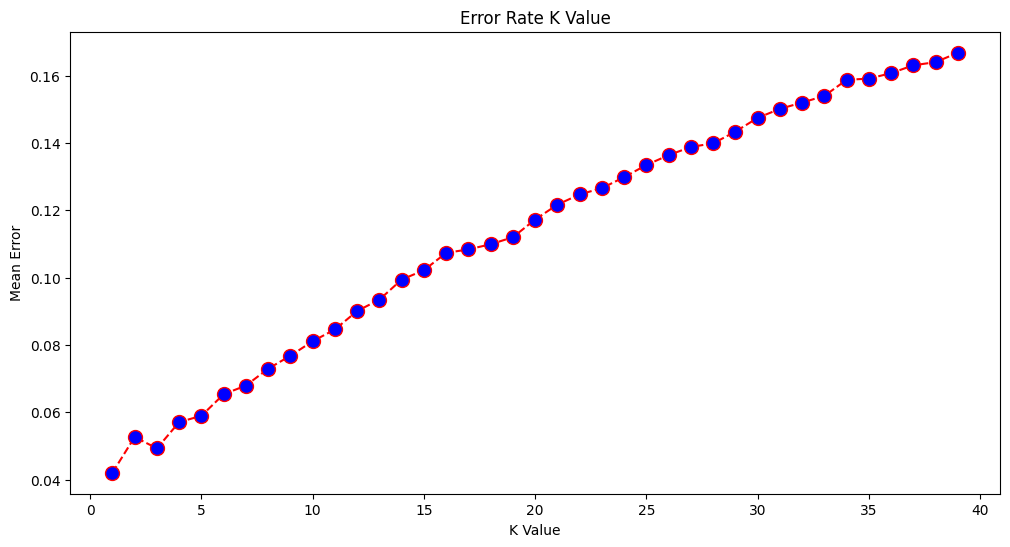

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [67]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
ap = cv2.VideoCapture(0)
with mp_hands.Hands(
    max_num_hands = 1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                coords = scaler.transform([coords])
                
                # Alternative for dataset using z coordinates.
                # Z coordinates is not recommended, since you need to adjust your distance from camera.
#                 coords = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in coords]).flatten())
                
                predicted = classifier.predict(coords)

            # Get status box
            cv2.rectangle(image, (0,0), (100, 60), (245, 90, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS'
                        , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(predicted[0])
                        , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('MediaPipe Hands', image)

        # Press esc to close webcam
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()


c:\Users\NAME\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


ValueError: X has 42 features, but StandardScaler is expecting 63 features as input.

: 